## In this file, we are analysing the weather of EWR airport from 2018 to 2022 whether climate is the main reason for increasing delays at EWR airport in the year 2022.

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import the modules
import os
import pandas as pd
#read the path
file_path = "D:/UMBC ANIL/Spring 2023/DS 602 ML/Project/Data Set/Aviation Data/ASPM Efficiency Data with RWY config"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list


['APM-Report-Efficiency-2018.csv.csv',
 'APM-Report-Efficiency-2019.csv.csv',
 'APM-Report-Efficiency-2020.csv.csv',
 'APM-Report-Efficiency-2021.csv.csv',
 'APM-Report-Efficiency-2022.csv.csv']

In [3]:
# combining all the data into single dataframe named 'data_weather'

data_weather = pd.concat([pd.read_csv(f) for f in file_list ], ignore_index=True)
data_weather

,Facility,Date,Local\nHour,GMT\nHour,Departures\nFor Efficiency\nComputation,Arrivals\nFor Efficiency\nComputation,Total\nFor Efficiency\nComputation,Weather,Ceiling\n(100) Feet,Visibility\n(Statute\nMiles),Temp\n(F),Wind\nAngle,Wind\nSpeed\n(Knots),Airport\nWeather,Runway,ADR,Capacity\nAAR,ADR+\nCapacity\nAAR,Efficiency\nAAR
0,EWR,01-01-2018,0,5,4,6,10,VMC,999,10.0,9.0,330,16.0,NaN,4R | 4L,40,40,80,40
1,EWR,01-01-2018,1,6,1,1,2,VMC,999,10.0,9.0,310,13.0,NaN,4R | 4L,40,40,80,40
2,EWR,01-01-2018,2,7,0,3,3,VMC,999,10.0,8.0,320,11.0,NaN,4R | 4L,40,40,80,40
3,EWR,01-01-2018,3,8,0,1,1,VMC,999,10.0,8.0,300,11.0,NaN,4R | 4L,40,40,80,40
4,EWR,01-01-2018,4,9,0,4,4,VMC,999,10.0,7.0,300,13.0,NaN,4R | 4L,40,40,80,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,EWR,12/31/2022,19,0,26,30,56,IMC,2,0.5,51.0,0,0.0,#NAME?,22L | 22R,32,29,61,29
43820,EWR,12/31/2022,20,1,29,34,63,IMC,3,1.0,51.0,220,3.0,#NAME?,22L | 22R,32,29,61,29
43821,EWR,12/31/2022,21,2,19,37,56,IMC,4,1.0,53.0,180,4.0,RA BR,22L | 22R,32,29,61,29
43822,EWR,12/31/2022,22,3,23,30,53,IMC,5,1.0,53.0,230,7.0,RA BR,22L | 22R,32,29,61,29


In [4]:
# converting datatype of 'Date' column into 'datetime' datatype

data_weather['Date'] = pd.to_datetime(data_weather['Date'])

In [5]:
# printing the first five rows

data_weather.head()

,Facility,Date,Local\nHour,GMT\nHour,Departures\nFor Efficiency\nComputation,Arrivals\nFor Efficiency\nComputation,Total\nFor Efficiency\nComputation,Weather,Ceiling\n(100) Feet,Visibility\n(Statute\nMiles),Temp\n(F),Wind\nAngle,Wind\nSpeed\n(Knots),Airport\nWeather,Runway,ADR,Capacity\nAAR,ADR+\nCapacity\nAAR,Efficiency\nAAR
0,EWR,2018-01-01,0,5,4,6,10,VMC,999,10.0,9.0,330,16.0,NaN,4R | 4L,40,40,80,40
1,EWR,2018-01-01,1,6,1,1,2,VMC,999,10.0,9.0,310,13.0,NaN,4R | 4L,40,40,80,40
2,EWR,2018-01-01,2,7,0,3,3,VMC,999,10.0,8.0,320,11.0,NaN,4R | 4L,40,40,80,40
3,EWR,2018-01-01,3,8,0,1,1,VMC,999,10.0,8.0,300,11.0,NaN,4R | 4L,40,40,80,40
4,EWR,2018-01-01,4,9,0,4,4,VMC,999,10.0,7.0,300,13.0,NaN,4R | 4L,40,40,80,40


In [6]:
#data_weather.info()

In [7]:
# renaming the columns of dataframe for clarity

data_weather.rename(columns = {
                        'Local\nHour'                                   :       'Local Hour',                   
                        'GMT\nHour'                                     :       'GMT Hour',       
                        'Departures\nFor Efficiency\nComputation'       :       'Departures For Efficiency Computation',
                        'Arrivals\nFor Efficiency\nComputation'         :       'Arrivals For Efficiency Computation',
                        'Total\nFor Efficiency\nComputation'            :       'Total For Efficiency Computation',  
                        'Ceiling\n(100) Feer'                           :       'Ceiling(100) Feet' ,
                        'Visibility\n(Statute\nMiles)'                  :       'Visibility (Statute Miles)',
                        'Temp\n(F)'                                     :       'Temp (F)',
                        'Wind\nAngle'                                   :       'Wind Angle',
                        'Wind\nSpeed\n(Knots)'                          :       'Wind Speed (Knots)',
                        'Airport\nWeather'                              :       'Airport Weather',
                        'Capacity\nAAR'                                 :       'Capacity AAR', 
                        'ADR+\nCapacity\nAAR'                           :       'ADR+Capacity AAR',
                        'Efficiency\nAAR'                               :       'Efficiency AAR'           }, inplace = True)

In [8]:
data_weather= data_weather.drop(['Facility', 'GMT Hour','Runway'], axis=1)

In [9]:
data_weather.head()

,Date,Local Hour,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Weather,Ceiling\n(100) Feet,Visibility (Statute Miles),Temp (F),Wind Angle,Wind Speed (Knots),Airport Weather,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR
0,2018-01-01,0,4,6,10,VMC,999,10.0,9.0,330,16.0,NaN,40,40,80,40
1,2018-01-01,1,1,1,2,VMC,999,10.0,9.0,310,13.0,NaN,40,40,80,40
2,2018-01-01,2,0,3,3,VMC,999,10.0,8.0,320,11.0,NaN,40,40,80,40
3,2018-01-01,3,0,1,1,VMC,999,10.0,8.0,300,11.0,NaN,40,40,80,40
4,2018-01-01,4,0,4,4,VMC,999,10.0,7.0,300,13.0,NaN,40,40,80,40


In [11]:
# creating Weather_VMC and Weather_IMC columns from weather column

for i in range( data_weather.shape[0] ):
    if data_weather.loc[i,'Weather']== 'VMC':
        data_weather.loc[i,'Weather_VMC']=1
        data_weather.loc[i,'Weather_IMC']=0
    elif data_weather.loc[i,'Weather']== 'IMC':
        data_weather.loc[i,'Weather_IMC']=1
        data_weather.loc[i,'Weather_VMC']=0   

In [12]:
data_weather.head()

,Date,Local Hour,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,Weather,Ceiling\n(100) Feet,Visibility (Statute Miles),Temp (F),Wind Angle,Wind Speed (Knots),Airport Weather,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC
0,2018-01-01,0,4,6,10,VMC,999,10.0,9.0,330,16.0,NaN,40,40,80,40,1.0,0.0
1,2018-01-01,1,1,1,2,VMC,999,10.0,9.0,310,13.0,NaN,40,40,80,40,1.0,0.0
2,2018-01-01,2,0,3,3,VMC,999,10.0,8.0,320,11.0,NaN,40,40,80,40,1.0,0.0
3,2018-01-01,3,0,1,1,VMC,999,10.0,8.0,300,11.0,NaN,40,40,80,40,1.0,0.0
4,2018-01-01,4,0,4,4,VMC,999,10.0,7.0,300,13.0,NaN,40,40,80,40,1.0,0.0


In [13]:
# grouping the 'data_weather' dataframe by date to convert it into date wise data

data_weather_date = data_weather.groupby('Date').agg({
                                 'Departures For Efficiency Computation': 'sum', 
                                 'Arrivals For Efficiency Computation': 'sum', 
                                 'Total For Efficiency Computation': 'sum', 
                                 'ADR': 'sum', 
                                 'Capacity AAR': 'sum', 
                                 'ADR+Capacity AAR': 'sum',
                                 'Efficiency AAR': 'sum', 
                                 'Weather_VMC': 'sum',
                                 'Weather_IMC': 'sum',   })

In [14]:
#resetting the index

data_weather_date = data_weather_date.reset_index()

In [15]:
data_weather_date.head()

,Date,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC
0,2018-01-01,547,533,1080,960,960,1920,954,24.0,0.0
1,2018-01-02,616,605,1221,960,960,1920,960,24.0,0.0
2,2018-01-03,635,616,1251,981,916,1897,916,24.0,0.0
3,2018-01-04,74,84,158,576,801,1377,801,11.0,13.0
4,2018-01-05,466,498,964,911,841,1752,751,24.0,0.0


In [16]:
# Adding year-month column for analysis

data_weather_date['year_month'] = data_weather_date['Date'].dt.strftime('%Y-%m')

In [17]:
# In 'data_weather_date' dataframe we can see that each row represents a separate date

data_weather_date.head()

,Date,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC,year_month
0,2018-01-01,547,533,1080,960,960,1920,954,24.0,0.0,2018-01
1,2018-01-02,616,605,1221,960,960,1920,960,24.0,0.0,2018-01
2,2018-01-03,635,616,1251,981,916,1897,916,24.0,0.0,2018-01
3,2018-01-04,74,84,158,576,801,1377,801,11.0,13.0,2018-01
4,2018-01-05,466,498,964,911,841,1752,751,24.0,0.0,2018-01


In [18]:
# grouping the 'data_date' dataframe by month to convert it into monthly data frame

data_weather_month = data_weather_date.groupby('year_month').agg({
                                 'Departures For Efficiency Computation': 'sum', 
                                 'Arrivals For Efficiency Computation': 'sum', 
                                 'Total For Efficiency Computation': 'sum', 
                                 'ADR': 'sum', 
                                 'Capacity AAR': 'sum', 
                                 'ADR+Capacity AAR': 'sum',
                                 'Efficiency AAR': 'sum', 
                                 'Weather_VMC': 'sum',
                                 'Weather_IMC': 'sum',   })

In [19]:
data_weather_month = data_weather_month.reset_index()

In [20]:
data_weather_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC
0,2018-01,17135,17118,34253,29421,29315,58736,29033,621.0,123.0
1,2018-02,16238,16175,32413,26435,26081,52516,25868,449.0,223.0
2,2018-03,17852,17834,35686,29242,29168,58410,28935,620.0,124.0
3,2018-04,18436,18419,36855,28097,27973,56070,27537,558.0,162.0
4,2018-05,19459,19412,38871,29067,28831,57898,28333,484.0,260.0


In [21]:
# converting the 'year_month' column into 'YYYY-MM-DD' format to extract year and month

data_weather_month['date'] = pd.to_datetime(data_weather_month['year_month'] + '-01')

# Extract the month and year values into separate columns
data_weather_month['month'] = data_weather_month['date'].dt.month
data_weather_month['year'] =data_weather_month['date'].dt.year

In [22]:
data_weather_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC,date,month,year
0,2018-01,17135,17118,34253,29421,29315,58736,29033,621.0,123.0,2018-01-01,1,2018
1,2018-02,16238,16175,32413,26435,26081,52516,25868,449.0,223.0,2018-02-01,2,2018
2,2018-03,17852,17834,35686,29242,29168,58410,28935,620.0,124.0,2018-03-01,3,2018
3,2018-04,18436,18419,36855,28097,27973,56070,27537,558.0,162.0,2018-04-01,4,2018
4,2018-05,19459,19412,38871,29067,28831,57898,28333,484.0,260.0,2018-05-01,5,2018


In [23]:
# dropping the 'date' column as we now have individual columns of month and year

data_weather_month = data_weather_month.drop('date', axis=1)

In [24]:
data_weather_month.head()

,year_month,Departures For Efficiency Computation,Arrivals For Efficiency Computation,Total For Efficiency Computation,ADR,Capacity AAR,ADR+Capacity AAR,Efficiency AAR,Weather_VMC,Weather_IMC,month,year
0,2018-01,17135,17118,34253,29421,29315,58736,29033,621.0,123.0,1,2018
1,2018-02,16238,16175,32413,26435,26081,52516,25868,449.0,223.0,2,2018
2,2018-03,17852,17834,35686,29242,29168,58410,28935,620.0,124.0,3,2018
3,2018-04,18436,18419,36855,28097,27973,56070,27537,558.0,162.0,4,2018
4,2018-05,19459,19412,38871,29067,28831,57898,28333,484.0,260.0,5,2018


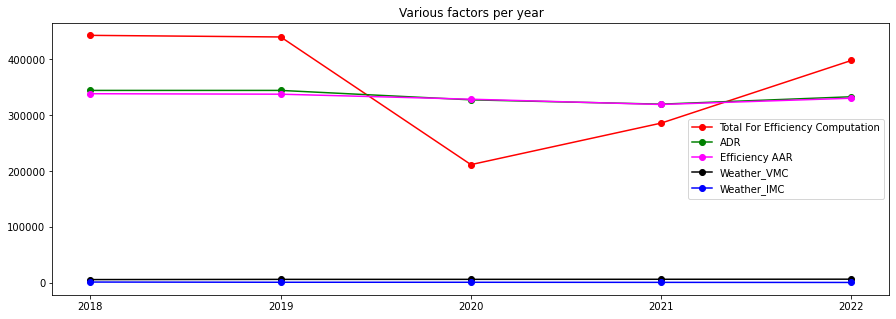

In [25]:
# line chart of various factors per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="Total For Efficiency Computation"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.figure(figsize=(15, 5))
plt.title("Various factors per year")
plt.plot(l,marker="o",color="red", label=var)



l=[]
var="ADR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="green", label=var)


l=[]
var="Efficiency AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="magenta", label=var)



l=[]
var="Weather_VMC"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="black", label=var)


l=[]
var="Weather_IMC"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="blue", label=var)


plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

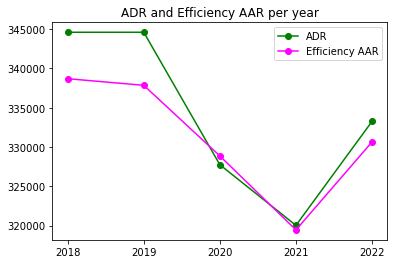

In [26]:
# line chart of ADR and Efficiency AAR per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="ADR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())
plt.title("ADR and Efficiency AAR per year")
plt.plot(l,marker="o",color="green", label=var)


l=[]
var="Efficiency AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="magenta", label=var)




plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

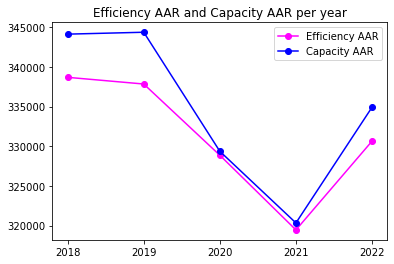

In [27]:
# line chart of Efficiency AAR and Capacity AAR per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="Efficiency AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.title("Efficiency AAR and Capacity AAR per year")
plt.plot(l,marker="o",color="magenta", label=var)



l=[]
var="Capacity AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="blue", label=var)

plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

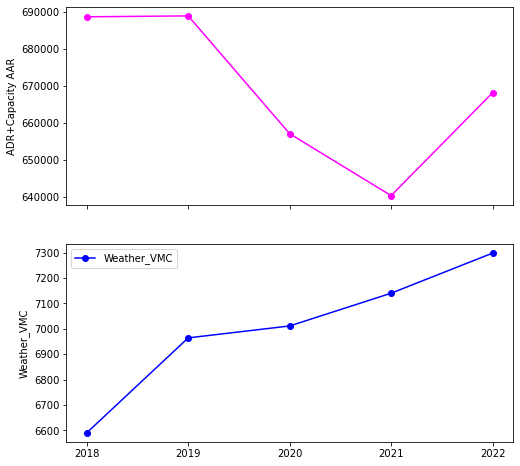

In [28]:
# subplot of 'ADR+capacity AAR' and 'Weather_VMC' per year

import matplotlib.pyplot as plt
import numpy as np

values=["2018","2019","2020","2021","2022"]

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))

var1 = "ADR+Capacity AAR"
l1 = [
    data_weather_month[data_weather_month.year == 2018][var1].sum(),
    data_weather_month[data_weather_month.year == 2019][var1].sum(),
    data_weather_month[data_weather_month.year == 2020][var1].sum(),
    data_weather_month[data_weather_month.year == 2021][var1].sum(),
    data_weather_month[data_weather_month.year == 2022][var1].sum()
]

axs[0].plot(l1, marker="o", color="magenta", label=var1)
axs[0].set_ylabel(var1)


var2 = "Weather_VMC"
l2 = [
    data_weather_month[data_weather_month.year == 2018][var2].sum(),
    data_weather_month[data_weather_month.year == 2019][var2].sum(),
    data_weather_month[data_weather_month.year == 2020][var2].sum(),
    data_weather_month[data_weather_month.year == 2021][var2].sum(),
    data_weather_month[data_weather_month.year == 2022][var2].sum()
]
axs[1].plot(l2, marker="o", color="blue", label=var2)
axs[1].set_ylabel(var2)
plt.legend(loc='best')
plt.setp(axs, xticks=np.arange(5), xticklabels=values)

plt.show()


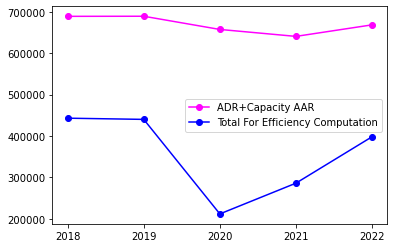

In [29]:
# line plot of ADR+Capacity AAR and Total For Efficiency Computation per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="ADR+Capacity AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="magenta", label=var)



l=[]
var="Total For Efficiency Computation"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="blue", label=var)

plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

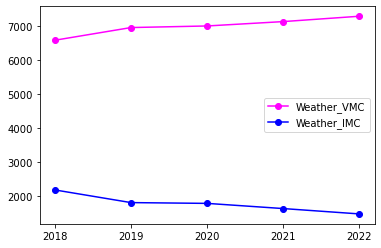

In [30]:
# line plot of 'Weather_VMC' and 'Weather_IMC' per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="Weather_VMC"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="magenta", label=var)



l=[]
var="Weather_IMC"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="blue", label=var)

plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

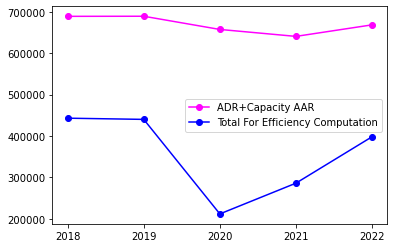

In [31]:
# line plot of 'ADR+Capacity AAR' and 'Total For Efficiency Computation' per year

values=["2018","2019","2020","2021","2022"]


l=[]
var="ADR+Capacity AAR"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="magenta", label=var)



l=[]
var="Total For Efficiency Computation"

l.append(data_weather_month[data_weather_month.year == 2018][var].sum())
l.append(data_weather_month[data_weather_month.year == 2019][var].sum())
l.append(data_weather_month[data_weather_month.year == 2020][var].sum())
l.append(data_weather_month[data_weather_month.year == 2021][var].sum())
l.append(data_weather_month[data_weather_month.year == 2022][var].sum())

plt.plot(l,marker="o",color="blue", label=var)

plt.legend(loc='best')
plt.xticks(np.arange(5), labels=values)
plt.show()

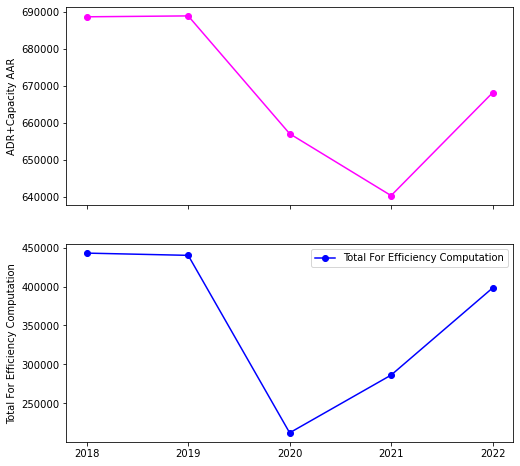

In [32]:
# line plot of 'ADR+Capacity AAR' and 'Total For Efficiency Computation' per year

import matplotlib.pyplot as plt
import numpy as np

values=["2018","2019","2020","2021","2022"]

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))

var1 = "ADR+Capacity AAR"
l1 = [
    data_weather_month[data_weather_month.year == 2018][var1].sum(),
    data_weather_month[data_weather_month.year == 2019][var1].sum(),
    data_weather_month[data_weather_month.year == 2020][var1].sum(),
    data_weather_month[data_weather_month.year == 2021][var1].sum(),
    data_weather_month[data_weather_month.year == 2022][var1].sum()
]

axs[0].plot(l1, marker="o", color="magenta", label=var1)
axs[0].set_ylabel(var1)


var2 = "Total For Efficiency Computation"
l2 = [
    data_weather_month[data_weather_month.year == 2018][var2].sum(),
    data_weather_month[data_weather_month.year == 2019][var2].sum(),
    data_weather_month[data_weather_month.year == 2020][var2].sum(),
    data_weather_month[data_weather_month.year == 2021][var2].sum(),
    data_weather_month[data_weather_month.year == 2022][var2].sum()
]
axs[1].plot(l2, marker="o", color="blue", label=var2)
axs[1].set_ylabel(var2)
plt.legend(loc='best')
plt.setp(axs, xticks=np.arange(5), xticklabels=values)

plt.show()
